# Students:
## Fabio Fonseca, 20171021275 
## Júlio Oliveira, 2016102462
## Tiago Fernandes, 20171021201

## 1. Introduction

In the past few missions, you've learned how to use Pandas to analyze data quickly and efficiently. You applied this knowledge by creating guided projects to solidify your knowledge. You'll go further in this project, and you'll build an end-to-end data analysis project on your own, using Pandas and Python.



## 2. The data

In this project, you'll be working with crime data from [Montgomery County, MD](https://en.wikipedia.org/wiki/Montgomery_County,_Maryland). Each row in the data is a crime reported by a law enforcement officer in <span style="background-color: #F9EBEA; color:##C0392B">2013</span> and entered into a database.

You'll want to download the data from the repository. After downloading the data, you'll want to create a new Jupyter notebook in the same folder, and ensure that any code or analysis you do on the data occurs in that notebook.

You can load the data in and display the first <span style="background-color: #F9EBEA; color:##C0392B">5</span> rows to get a better idea of the structure:

>```python
import pandas as pd
crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")
crimes.head()
```

You'll also want to display all of the column names with:

>```python
crimes.columns
```
>```python
Index(['Incident ID', 'CR Number', 'Dispatch Date / Time', 'Class',
       'Class Description', 'Police District Name', 'Block Address', 'City',
       'State', 'Zip Code', 'Agency', 'Place', 'Sector', 'Beat', 'PRA',
       'Start Date / Time', 'End Date / Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location', 'Address Number'],
      dtype='object')
```

After displaying some of the data, make sure you look through and understand each column. It can be helpful to display the first few values in each column in order to understand it better. It can also be useful to perform a Google search to help give you context for columns. For example, looking up <span style="background-color: #F9EBEA; color:##C0392B">Police District Number Montgomery County</span> bring you to this [page](https://www.montgomerycountymd.gov/pol/districts/map.html), which helps you understand them. Make sure to write up a Markdown cell explaining anything relevant that you learned.

You'll also want to explore missing values in each column. Why do you think certain columns have missing values? Make sure to write up your thoughts on missing values, and how they'll impact your analysis.

Also make sure to look at the format of each column. For example, <span style="background-color: #F9EBEA; color:##C0392B">Zip Code</span> is a float column, but if you know about Zip codes in the US, you know that they're always integers. Keeping that this column is of the "wrong" type in mind will help you as you analyze the data.

In [28]:
#Import packages and load csv data file
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from numpy import arange

crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")

#Print all data from csv file
crimes

,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number
0,200939101,13047006,10/02/2013 07:52:41 PM,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,20872.0,...,NaN,NaN,NaN,10/02/2013 07:52:00 PM,NaN,NaN,NaN,OTHER,NaN,25700.0
1,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,...,M,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN
2,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,...,P,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN
3,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,...,D,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN
4,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,...,D,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN
5,200931009,13037095,08/07/2013 11:31:19 PM,1864,CDS IMPLMNT-MARIJUANA/HASHISH,MONTGOMERY VILLAGE,N270 CUTOVR X8 TO X9 HWY,GAITHERSBURG,MD,NaN,...,P,6P1,444.0,08/07/2013 11:31:00 PM,NaN,NaN,NaN,6D,NaN,NaN
6,200931987,13037600,08/10/2013 07:52:08 PM,1833,CDS-POSS COCAINE& DERIVATIVES,MONTGOMERY VILLAGE,SAM EIG HWY,ROCKVILLE,MD,20877.0,...,P,6P2,660.0,08/10/2013 07:52:00 PM,NaN,NaN,NaN,6D,NaN,NaN
7,200936488,13043769,09/15/2013 06:56:49 AM,2791,ALL OTHER NON-TRAFFIC CRIM OFFENSES,MONTGOMERY VILLAGE,WOODFIELD RD,WASHINGTON GROVE,MD,20877.0,...,P,6P3,419.0,09/15/2013 06:40:00 AM,NaN,NaN,NaN,6D,NaN,NaN
8,200938488,13046321,09/29/2013 12:44:15 AM,2812,DRIVING UNDER THE INFLUENCE,ROCKVILLE,WOOTTON PKW,ROCKVILLE,MD,20852.0,...,A,1A1,263.0,09/29/2013 12:44:00 AM,NaN,NaN,NaN,1D,NaN,NaN
9,200939746,13047878,10/07/2013 11:39:48 PM,2812,DRIVING UNDER THE INFLUENCE,ROCKVILLE,WOOTTON PKW,ROCKVILLE,MD,20850.0,...,A,1A1,260.0,10/07/2013 11:39:00 PM,10/08/2013 12:30:00 AM,NaN,NaN,1D,NaN,NaN


### Observations from crimes database:

* There are more than twenty thousand occurrences (23369), where each occurrence contains 22 attributes;

### Individual analysis from each Crimes table column:

These descriptions are based on direct understanding of each column name. Below, a brief description of some specific columns.

- **Incident ID**: Maybe a occurrences unique identifier. Through a previous check, was possible to verify that all are unique values.
- **CR Number**: *Unknown*.
- **Dispatch Date/Time**: Maybe something associated to release moment.
- **Class**: A kind of code for occurrence class.
- **Class Description**: Description of occurrence class (item above).
- **Police District Name**: Responsible policial district name of occurrence.
- **Agency**: *Unknown*.
- **Place**: A description of occurrence place, like "in the house", "in the car", etc.
- **Sector**: A letter that represents the sector, in a district view.
- **Beat**: Police patrol identifier
- **PRA**: *Unknown*.
- **Start Date/Time**: Occurrence start register
- **End Date/Time**: Occurrence end register
- **Police District Number**: Police district identifier number

Among other more direct attributes: **Block Address, City, State, Zip Code, Latitude, Longitude, Location and Address Number**.

If we perform an analysis of the number of null columns in the data set, we have the nine following columns:
- **End Date / Time**: 10178.
- **Latitude**: 161.
- **Longitude**: 161.
- **Location**: 161.
- **Address Number**: 132.
- **Sector**: 46.
- **Zip Code**: 30.
- **Beat**: 8.
- **PRA**: 6.

For a better detailing, see the cell below

In [29]:
crimes.isnull().sum()

Incident ID                   0
CR Number                     0
Dispatch Date / Time          0
Class                         0
Class Description             0
Police District Name          0
Block Address                 0
City                          0
State                         0
Zip Code                     30
Agency                        0
Place                         0
Sector                       46
Beat                          8
PRA                           6
Start Date / Time             0
End Date / Time           10178
Latitude                    161
Longitude                   161
Police District Number        0
Location                    161
Address Number              132
dtype: int64

## 3. Analyzing the times of crimes

The  <span style="background-color: #F9EBEA; color:##C0392B">Dispatch Date / Time</span> column looks very interesting, because it allows us to figure out when crimes are most likely to occur. You can use this column to answer questions like:

- What day of the week are the most crimes committed on? (ie Monday, Tuesday, etc)
- During what time of day are the most crimes committed?
- During what month are the most crimes committed?

You can answer these questions by first parsing the <span style="background-color: #F9EBEA; color:##C0392B">Dispatch Date / Time</span> column using the [pandas.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) function, like this:

>```python
d_time = pandas.to_datetime(crimes["Dispatch Date / Time"])
```

After doing the type conversion, you'll need to extract the components of the datetime you're interested in. You can see documentation for this [here](http://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties). After the extraction, you can use the <span style="background-color: #F9EBEA; color:##C0392B">pandas.Series.value_counts</span> method to count up the items you want.

There is some nuance around counting up the time of day when crimes are committed. You'll have to decide how you want to define "time of day". This can be as simple as using the hour, or as complex as assigning categories to certain times, like "morning", "afternoon", "evening", and "night".

As you answer these questions, make sure to document your code, and add in explanations after each cell. Your explanations should discuss the answer, along with anything interesting your discovered.

Were you surprised by your findings? Why do you think that crimes follow the patterns that they do? It may be useful to do some research here to see if you can find support for your theories.

After you're done, take a look at the <span style="background-color: #F9EBEA; color:##C0392B">End Date / Time</span> and <span style="background-color: #F9EBEA; color:##C0392B">Start Date / Time</span> columns. Are these different from the <span style="background-color: #F9EBEA; color:##C0392B">Dispatch Date / Time</span> column? Would it be useful to use one or both of those columns to do this analysis instead?


In [30]:
# Separeted block, too slow
dispatch_date_crimes = crimes["Dispatch Date / Time"]
dispatch_date_time = pd.to_datetime(dispatch_date_crimes)

### a) What day of the week are the most crimes committed on? (ie Monday, Tuesday, etc)
Solution: Just take the dayofweek attribute and make a count from values.



 - What day of the week are the most crimes committed on? (ie Monday, Tuesday, etc) 

1    3836
0    3734
2    3611
4    3594
3    3404
5    2807
6    2383
Name: Dispatch Date / Time, dtype: int64
obs.: 0 = monday, 6 = sunday


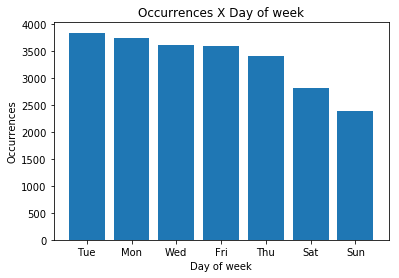

In [31]:
#What day of the week are the most crimes committed on? (ie Monday, Tuesday, etc)
#Solution: Just take the dayofweek attribute and make a count from values.

#Code:
print(" - What day of the week are the most crimes committed on? (ie Monday, Tuesday, etc)","\n")
occurrences_per_day_of_week = dispatch_date_time.dt.dayofweek.value_counts()
print(occurrences_per_day_of_week)
print("obs.: 0 = monday, 6 = sunday")

plt.bar(range(len(occurrences_per_day_of_week)), occurrences_per_day_of_week.values, align='center')
plt.xticks(range(len(occurrences_per_day_of_week)), ['Tue', 'Mon', "Wed", "Fri", "Thu", "Sat", "Sun"])
plt.title("Occurrences X Day of week")
plt.xlabel("Day of week")
plt.ylabel("Occurrences")
plt.show()

print("===================================================================================")

### b) During what time of day are the most crimes committed?
Solution: First, was made a dictionary with the limits of each part of day. After, for each part of day, were recorded all occurrences that were included into especific limits.

          Morning:   06:00:00 ~ 11:59:59
          Afternoon: 12:00:00 ~ 17:59:59
          Evening:   18:00:00 ~ 23:59:59
          Night:     00:00:00 ~ 05:59:59



 - During what time of day are the most crimes committed? 

{'morning': 6971, 'afternoon': 6842, 'evening': 6286, 'night': 3265}


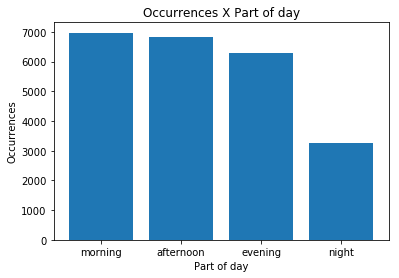

In [32]:
#During what time of day are the most crimes committed?
#Solution: First, was made a dictionary with the limits of each part of day. After, for each part of day, 
#          were recorded all occurrences that were included into especific limits.
#          Morning:   06:00:00 ~ 11:59:59
#          Afternoon: 12:00:00 ~ 17:59:59
#          Evening:   18:00:00 ~ 23:59:59
#          Night:     00:00:00 ~ 05:59:59

#Code:
print(" - During what time of day are the most crimes committed?","\n")
categorical_part_of_day = {'morning' : {'init':datetime.time(6,0,0), 'finish':datetime.time(11,59,59)},   # morning: 05h00 AM ~ 11h59 AM
                           'afternoon' : {'init':datetime.time(12,0,0),'finish':datetime.time(17,59,59)}, # afternoon 12h00 PM ~ 16h59 PM
                           'evening' : {'init':datetime.time(18,0,0),'finish':datetime.time(23,59,59)},   # afternoon 17h00 PM ~ 20h59 PM
                           'night' : {'init':datetime.time(0,0,0),'finish':datetime.time(5,59,59)}        # afternoon 21h00 PM ~ 04h59 PM
                          }      
crimes_per_part_of_day = {}
for part_of_day, limits in categorical_part_of_day.items() :
    crimes_per_part_of_day[part_of_day] = dispatch_date_time.dt.time[(dispatch_date_time.dt.time > limits['init']) & (dispatch_date_time.dt.time < limits['finish'])].size 

print(crimes_per_part_of_day)

plt.bar(range(len(crimes_per_part_of_day)), crimes_per_part_of_day.values(), align='center')
plt.xticks(range(len(crimes_per_part_of_day)), crimes_per_part_of_day.keys())
plt.title("Occurrences X Part of day")
plt.xlabel("Part of day")
plt.ylabel("Occurrences")
plt.show()

print("===================================================================================")

### c) During what month are the most crimes committed?
Solution: Same as dayofweek, we use the month attribute and then count all values.

 - During what month are the most crimes committed? 

10    4075
8     4002
11    3941
9     3927
12    3904
7     3520
Name: Dispatch Date / Time, dtype: int64


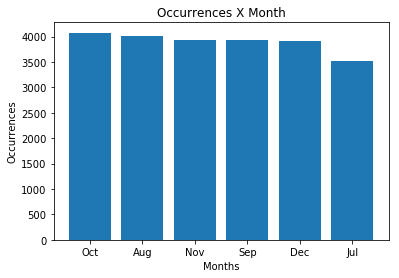

In [33]:
#During what month are the most crimes committed?
#Solution: Same as dayofweek, we use the month attribute and then count all values.

#Code:
print(" - During what month are the most crimes committed?","\n")
occurrences_per_months = dispatch_date_time.dt.month.value_counts()
print(occurrences_per_months)

plt.bar(range(len(occurrences_per_months)), occurrences_per_months.values, align='center')
plt.xticks(range(len(occurrences_per_months)), ['Oct', "Aug", "Nov", "Sep", "Dec", "Jul"])
plt.title("Occurrences X Month")
plt.xlabel("Months")
plt.ylabel("Occurrences")
plt.show()

print("===================================================================================")

## 4. Analyzing locations of crimes

There are a few columns that encode information about the location of crimes:

- <span style="background-color: #F9EBEA; color:##C0392B">Police District Name</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Block Address</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Zip Code</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Sector</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Beat</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Police District Number</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Location</span>
- <span style="background-color: #F9EBEA; color:##C0392B">Address Number</span>

These columns have varying numbers of missing values, and varying granularity. Some of the columns represent areas with large granularity (like police districts), whereas some represent areas with small granularity, like <span style="background-color: #F9EBEA; color:##C0392B">Latitude</span>, and <span style="background-color: #F9EBEA; color:##C0392B">Longitude</span>.


In order to decide which column to use to analyze the locations of crimes, you need to utilize the following criteria:

- **Granularity**. Areas that are too small aren't great, because only a few crimes were committed inside them, which makes it hard to analyze and compare. For example, if I tell you that Silver Spring (a city in Montgomery County) is the place with the most crimes, you'll know to avoid that area. However, if I tell you that a 100 foot section of Silver Spring has the most crimes, it won't be as helpful (it's unlikely that you'll ever be in that 100 foot section).
- **Comprehensibility**. You looked up the Police District map of Montgomery County before, so it's simple to tell what area corresponds to district <span style="background-color: #F9EBEA; color:##C0392B">6</span>. However, what area does Beat <span style="background-color: #F9EBEA; color:##C0392B">5M1</span> correspond to? You may be able to look this up, but it's harder to comprehend.
- **Missing values**. If a column has a lot of missing values, that means that the conclusions you draw are less valid, because you don't know if the missing data is systematic (ie all data for a given district is missing) or random (equal amounts of data are missing from each district). You should try to select a column that has minimal missing values.

Based on the above criteria, pick a column that you want to use to analyze location. After picking a column, see if you can answer these questions:

- In what area did the most crimes occur? What physical locations (like cities) does this area correspond to?
- Which area has the highest number of crimes per capita? You may be able to find population data per area online. For example, [this](https://www.montgomerycountymd.gov/POL/Resources/Files/crime/MCP2015AnnualCrimeReportFINAL.pdf) annual report has per-district populations towards the bottom.

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.


In [34]:
# Load columns and check null values
sectors_crime = crimes["Sector"]
districts_crime = crimes["Police District Number"]
city_crime = crimes["City"]
sectors_is_null = sectors_crime.isnull()
districts_is_null = districts_crime.isnull()

#Remove null values
sectors_crime = sectors_crime[~sectors_is_null]
districts_crime = districts_crime[~districts_is_null]

### a) In what area did the most crimes occur?
Solution: We are using area as Police District Number. So, just take the Police District Number column and make a count from values.

 - In what area did the most crimes occur? (Police District Number) 

3D       5533
4D       4375
6D       3812
1D       3480
2D       3383
5D       2755
TPPD       23
OTHER       8
Name: Police District Number, dtype: int64


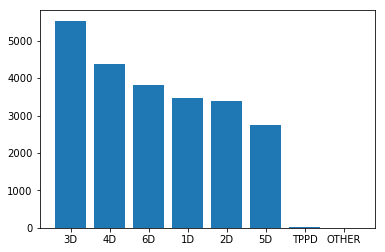

In [35]:
#In what area did the most crimes occur?
#Solution: We are using area as Police District Number. So, just take the Police District
#          Number column and make a count from values.

#Code:
print(" - In what area did the most crimes occur? (Police District Number)","\n")
crimes_per_district = districts_crime.value_counts()
print(crimes_per_district)

plt.bar(range(len(crimes_per_district)), crimes_per_district.values, align='center')
plt.xticks(range(len(crimes_per_district)), crimes_per_district.index)
plt.show()

print("===================================================================================")

### b) What physical locations (like cities) does this area correspond to?
Solution: For each district name, was considered all cities, from unique way, that had association into the occurrences

In [36]:
#What physical locations (like cities) does this area correspond to?
#Solution: For each district name, was considered all cities, from unique way, that had 
#          association into the occurrences

#Code:
print(" - What physical locations (like cities) does this area correspond to?","\n")
cities_per_district = {}
for district in districts_crime.unique():    
    cities_per_district[district] = city_crime[districts_crime == district].unique()  
    print(district,':',cities_per_district[district])
print("===================================================================================")

 - What physical locations (like cities) does this area correspond to? 

OTHER : ['DAMASCUS' 'CHEVY CHASE' 'KISSIMMEE' 'LAUREL' 'HYATTSVILLE' 'GAITHERSBURG'
 'OLNEY' 'GERMANTOWN']
5D : ['GERMANTOWN' 'DAMASCUS' 'CLARKSBURG' 'BOYDS' 'BROOKEVILLE' 'GAITHERSBURG'
 'POOLESVILLE' 'MOUNT AIRY' 'DICKERSON' 'MONTGOMERY VILLAGE' 'BARNESVILLE'
 'DERWOOD']
6D : ['GAITHERSBURG' 'ROCKVILLE' 'WASHINGTON GROVE' 'MONTGOMERY VILLAGE'
 'DERWOOD' 'GERMANTOWN' 'OLNEY']
2D : ['CHEVY CHASE' 'SILVER SPRING' 'BETHESDA' 'ROCKVILLE' 'KENSINGTON'
 'POTOMAC' 'CABIN JOHN' 'GLEN ECHO']
1D : ['ROCKVILLE' 'DERWOOD' 'BOYDS' 'GAITHERSBURG' 'POTOMAC' 'SILVER SPRING'
 'POOLESVILLE' 'DICKERSON' 'GERMANTOWN' 'BEALLSVILLE']
3D : ['SILVER SPRING' 'BURTONSVILLE' 'TAKOMA PARK' 'CHEVY CHASE' 'SPENCERVILLE'
 'LAUREL']
4D : ['SILVER SPRING' 'ROCKVILLE' 'OLNEY' 'BROOKEVILLE' 'KENSINGTON'
 'SANDY SPRING' 'BRINKLOW' 'ASHTON' 'SPENCERVILLE' 'GAITHERSBURG']
TPPD : ['TAKOMA PARK' 'SILVER SPRING']


In [37]:
crimes.groupby(["Police District Number",'City']).size().head(53)

Police District Number  City              
1D                      BEALLSVILLE              2
                        BOYDS                    4
                        DERWOOD                154
                        DICKERSON               19
                        GAITHERSBURG           398
                        GERMANTOWN              37
                        POOLESVILLE            104
                        POTOMAC                365
                        ROCKVILLE             2394
                        SILVER SPRING            3
2D                      BETHESDA              1736
                        CABIN JOHN              18
                        CHEVY CHASE            496
                        GLEN ECHO                4
                        KENSINGTON             275
                        POTOMAC                162
                        ROCKVILLE              534
                        SILVER SPRING          158
3D                      BURTONSVILLE   

### c) Which area has the highest number of crimes per capita? You may be able to find population data per area online. For example, this annual report has per-district populations towards the bottom.
Solution: First of all, we collected the population data per district from external resource. With this, for each district population, we divided the amount of crimes by district population.

In [38]:
#Which area has the highest number of crimes per capita? You may be able to find population data per area online. For example, this annual report has per-district populations towards the bottom.
#Solution: First of all, we collected the population data per district from external resource.
#          With this, for each district population, we divided the amount of crimes by 
#          district population.

#Code:
print(" - Which area has the highest number of crimes per capita? You may be able to find population data per area online. For example, this annual report has per-district populations towards the bottom.","\n")
population_per_district = {"1D":148000, "2D":182000, "3D":152000, "4D":207000, "5D":130000, "6D":146000}
crimes_per_capita = {}
for district, population in population_per_district.items():
    crimes_per_capita[district] = crimes_per_district[district]/population
    print(district,':',crimes_per_capita[district])
print("obs.: Just these districts has a population values. No records for OTHER and TPPD districts.")
print("===================================================================================")

 - Which area has the highest number of crimes per capita? You may be able to find population data per area online. For example, this annual report has per-district populations towards the bottom. 

1D : 0.0235135135135
2D : 0.0185879120879
3D : 0.0364013157895
4D : 0.0211352657005
5D : 0.0211923076923
6D : 0.0261095890411
obs.: Just these districts has a population values. No records for OTHER and TPPD districts.


## 5. Analyzing types of crime

The <span style="background-color: #F9EBEA; color:##C0392B">Class Description</span> column tells us something about the type of crime that was committed. We can use this column to discover which crimes are committed most often.

Here are some initial questions to answer:

- Which crimes are the most common? Least common?
- Can you split the types of crimes manually into "Violent" (caused harm to others or involved weapons) and "Nonviolent" (mostly property crimes, like theft? What's the most common violent crime? The most common nonviolent?

To manually split up violent and nonviolent crimes, just assign each crime to a category. For example, <span style="background-color: #F9EBEA; color:##C0392B">ASSAULT & BATTERY - CITIZEN</span> is violent, and <span style="background-color: #F9EBEA; color:##C0392B">VANDALISM-MOTOR VEHICLE</span> is nonviolent. It may be useful to create a column called <span style="background-color: #F9EBEA; color:##C0392B">Violent</span>, and then use the [pandas.DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) method to assign **True** or **False** to each row in the column. For example, if **ASSAULT** is in Class Description, it's violent, but if **LARCENY** is in Class Description, it's nonviolent.

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.

In [39]:
#Load backup database from crimes and prepares important datas for the question 
crimes1 =crimes
crimes2 =crimes
id_crime = crimes["Class"]
description_crime = crimes["Class Description"]
city_crime = crimes["City"]
column_names = crimes.columns
info_crimes = column_names.tolist()
un_crimes = crimes["Class"].unique()
un_des_crimes = crimes["Class Description"].unique()
mul_cols = crimes[["Class", "Class Description"]]

### a) Which crimes are the most common? Least common?
Solution: For this question, just a value_counts call on Class column resolve the problem. After, was made a process to show the results.

In [40]:
#Which crimes are the most common? Least common?
#Solution: For this question, just a value_counts call on Class column resolve the problem. After, was made a
#          process to show the results.

#Code:
print(" - Which crimes are the most common? Least common?\n")
rate_crimes_per_district = id_crime.value_counts()
desc_crimes_per_district = description_crime[rate_crimes_per_district.index.tolist()]
desc_list = []
for i in range (0, len(desc_crimes_per_district)):
    desc_list.append(mul_cols.loc[mul_cols["Class"] == rate_crimes_per_district.index[i], "Class Description"].values[0])
dat1 = pd.DataFrame({'ID Class':rate_crimes_per_district.index.tolist()})
dat2 = pd.DataFrame({'Class Description':desc_list})
dat3 = pd.DataFrame({'Amount':rate_crimes_per_district.tolist()})
dat4 = dat1.join(dat2)
dat5 = dat4.join(dat3)
print("Most common")
print(dat5.head());
print("\nLeast common")
onescrimes = pd.DataFrame(columns=dat5.columns)
for i in range (0, len(dat5) - 1):
    if dat5.iloc[i, dat5.columns.get_loc('Amount')] == 1:
        onescrimes.loc[i] = dat5.loc[i]
print(onescrimes);


print("===================================================================================")

 - Which crimes are the most common? Least common?

Most common
   ID Class                Class Description  Amount
0      2812      DRIVING UNDER THE INFLUENCE    1710
1      1834       CDS-POSS MARIJUANA/HASHISH    1334
2      2938                  POL INFORMATION    1191
3       614      LARCENY FROM AUTO OVER $200     914
4       617  LARCENY FROM BUILDING OVER $200     895

Least common
    ID Class                       Class Description Amount
254     2912                   SUDDEN DEATH DROWNING      1
255     2814                        PARKING OFFENSES      1
256     1425          VANDALISM GRAFFITI CHURCH/TEMP      1
257      529            BURG NO FORCE - SCH/TIME UNK      1
258      343               ROB STN ARM - GAS/SVC STA      1
259     1857      CDS RX FORGERY INHALANT/GLUE/AEROS      1
260     1837          CDS-POSS INHALANT/GLUE/AEROSOL      1
261      519                 BURG FORCE-SCH/TIME UNK      1
262     1431  VANDALISM POSSESSION GRAFFITI MATERIAL      1
263 

### b) Can you split the types of crimes manually into "Violent" (caused harm to others or involved weapons) and "Nonviolent" (mostly property crimes, like theft? What's the most common violent crime? The most common nonviolent?
Solution: For this question, first we create a new column called Violent with default value false. After, was made a classifier, where the description of class was based for decide the type of crime. At end, the information about the most common violent and nonviolent crimes was obtained.

In [41]:
#Can you split the types of crimes manually into "Violent" (caused harm to others or involved weapons) and "Nonviolent" 
#(mostly property crimes, like theft? What's the most common violent crime? The most common nonviolent?
#Solution: For this question, first we create a new column called Violent with default value false. After, was made
#          a classifier, where the description of class was based for decide the type of crime. At end, the 
#          information about the most common violent and nonviolent crimes was obtained.
#Code:
print("\n - Can you split the types of crimes manually into 'Violent' (caused harm to others or involved weapons) and 'Nonviolent'" 
      +"(mostly property crimes, like theft? What's the most common violent crime? The most common nonviolent?")
listfalse = [False]*crimes.size
dat10 = pd.DataFrame({'Violent':listfalse})
crimes1 = crimes1.join(dat10);

if 1:
    listviolent = []    
    new_listviolent = []
    listviolent.append( [(mul_cols.loc[mul_cols["Class Description"] == s, "Class"].values[0])  for s in crimes["Class Description"] if "ASSLT" in s])
    for item in listviolent[0]:
        if item not in new_listviolent:
            new_listviolent.append(item)
    listviolent.append( [(mul_cols.loc[mul_cols["Class Description"] == s, "Class"].values[0])  for s in crimes["Class Description"] if "ASSAULT" in s])
    for item in listviolent[1]:
        if item not in new_listviolent:
            new_listviolent.append(item)
    listviolent.append( [(mul_cols.loc[mul_cols["Class Description"] == s, "Class"].values[0])  for s in crimes["Class Description"] if "WEAPON" in s])
    for item in listviolent[2]:
        if item not in new_listviolent:
            new_listviolent.append(item)
    listviolent.append( [(mul_cols.loc[mul_cols["Class Description"] == s, "Class"].values[0])  for s in crimes["Class Description"] if "HOMICIDE" in s])
    for item in listviolent[3]:
        if item not in new_listviolent:
            new_listviolent.append(item)
    listviolent.append( [(mul_cols.loc[mul_cols["Class Description"] == s, "Class"].values[0])  for s in crimes["Class Description"] if "ROB" in s])
    for item in listviolent[4]:
        if item not in new_listviolent:
            new_listviolent.append(item)
    listviolent.append( [(mul_cols.loc[mul_cols["Class Description"] == s, "Class"].values[0])  for s in crimes["Class Description"] if "WPN" in s])
    for item in listviolent[5]:
        if item not in new_listviolent:
            new_listviolent.append(item)
    listviolent.append( [(mul_cols.loc[mul_cols["Class Description"] == s, "Class"].values[0])  for s in crimes["Class Description"] if "RAPE" in s])
    for item in listviolent[6]:
        if item not in new_listviolent:
            new_listviolent.append(item)
    listviolent.append( [(mul_cols.loc[mul_cols["Class Description"] == s, "Class"].values[0])  for s in crimes["Class Description"] if "KIDNAP" in s])
    for item in listviolent[7]:
        if item not in new_listviolent:
            new_listviolent.append(item)
    listviolent.append( [(mul_cols.loc[mul_cols["Class Description"] == s, "Class"].values[0])  for s in crimes["Class Description"] if "ABUSE" in s])
    for item in listviolent[8]:
        if item not in new_listviolent:
            new_listviolent.append(item)
    for item in new_listviolent:
        if item not in new_listviolent:
            new_listviolent.append(item)
            
    sizeofcrimes = len(crimes1) - 1         
    for j in range (0, len(new_listviolent) - 1):
        for i in range (0, len(crimes1) - 1):               
                if crimes1.iloc[i, crimes1.columns.get_loc('Class')] == new_listviolent[j]:
                    crimes1.iloc[i, crimes1.columns.get_loc('Violent')] = True
  
    print(crimes1[["Class", "Class Description", "Violent"]])    
    dat_s = pd.DataFrame({'Violent':crimes1['Violent']})
    crimes2 = crimes2.join(dat_s);    
    crimes2.to_csv("MontgomeryCountyCrime2013_1.csv")    
    rate_violent = crimes1["Violent"].value_counts()    
    most_common_violent_crimes = crimes1[crimes1['Violent'] == True]['Class Description'].value_counts()
    most_common_nonviolent_crimes = crimes1[crimes1['Violent'] == False]['Class Description'].value_counts()
    print('\nMost common violent crimes:')
    print(most_common_violent_crimes.head())
    print('\nMost common nonviolent crimes:')
    print(most_common_nonviolent_crimes.head())
    print("===================================================================================")


 - Can you split the types of crimes manually into 'Violent' (caused harm to others or involved weapons) and 'Nonviolent'(mostly property crimes, like theft? What's the most common violent crime? The most common nonviolent?
       Class                     Class Description  Violent
0        511                  BURG FORCE-RES/NIGHT    False
1       1834            CDS-POSS MARIJUANA/HASHISH    False
2       1412               VANDALISM-MOTOR VEHICLE    False
3       2752   FUGITIVE FROM JUSTICE(OUT OF STATE)    False
4       2812           DRIVING UNDER THE INFLUENCE    False
5       1864         CDS IMPLMNT-MARIJUANA/HASHISH    False
6       1833         CDS-POSS COCAINE& DERIVATIVES    False
7       2791   ALL OTHER NON-TRAFFIC CRIM OFFENSES    False
8       2812           DRIVING UNDER THE INFLUENCE    False
9       2812           DRIVING UNDER THE INFLUENCE    False
10      2938                       POL INFORMATION    False
11      2812           DRIVING UNDER THE INFLUENCE    F

## 6. Combine Analysis

After doing some analysis on types of crimes, you can combine our analysis with location and time data to answer more complex questions, like:

- Where are the most violent crimes committed? How about nonviolent?
- When are the most violent crimes committed? How about nonviolent?

Make sure to write up the answers to these questions, along with your code, and explain why you reached the conclusions you did.

In [42]:
#Load initial data, create variables and functions definitions

def plotperiodofweel(periods, str_sig):
    num_cols = ['night', 'morning', 'afternoon', 'evening']
    bar_heights = periods
    bar_positions = arange(len(periods)) + 0.75
    fig, ax = plt.subplots()
    ax.bar(bar_positions, bar_heights, 0.5)
    #plt.xticks(rotation=90)
    tick_positions = range(1,5)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(num_cols, rotation=90)
    plt.xlabel("Period")
    plt.ylabel("Crimes")
    plt.title("Chart of occurrences of " + str_sig +  " crimes in the week")
    plt.show()
    return

def calc_day_of_week(str, crimes):
    print("\n"+str)
    night = []
    morning = []
    afternoon = []
    evening = []
    night = [s for s in crimes["Start Date / Time"] if (s.endswith("AM") & ((s.endswith("12",10,13)) | s.endswith("01",10,13) |
                                                                             s.endswith("02",10,13) | s.endswith("03",10,13) |
                                                                             s.endswith("04",10,13) | s.endswith("05",10,13)))]
    morning = [s for s in crimes["Start Date / Time"] if (s.endswith("AM") & ((s.endswith("06",10,13)) | s.endswith("07",10,13) |
                                                                             s.endswith("08",10,13) | s.endswith("09",10,13) |
                                                                             s.endswith("10",10,13) | s.endswith("11",10,13)))]
    afternoon = [s for s in crimes["Start Date / Time"] if (s.endswith("PM") & ((s.endswith("12",10,13)) | s.endswith("01",10,13) |
                                                                             s.endswith("02",10,13) | s.endswith("03",10,13) |
                                                                             s.endswith("04",10,13) | s.endswith("05",10,13)))]
    evening = [s for s in crimes["Start Date / Time"] if (s.endswith("PM") & ((s.endswith("06",10,13)) | s.endswith("07",10,13) |
                                                                             s.endswith("08",10,13) | s.endswith("09",10,13) |
                                                                             s.endswith("10",10,13) | s.endswith("11",10,13)))]
    print("At night crimes:", len(night))
    print("At morning crimes:", len(morning))
    print("At afternoon crimes:", len(afternoon))
    print("At evening crimes:", len(evening))
    plotperiodofweel([len(night),len(morning),len(afternoon),len(evening)], str)
    return [len(night),len(morning),len(afternoon),len(evening)];

crimes = pd.read_csv("MontgomeryCountyCrime2013_1.csv")
viol_crime = crimes["Violent"]
sectors_crime = crimes["Sector"]
districts_crime = crimes["Police District Number"]
city_crime = crimes["City"]
column_names = crimes.columns

### a) Where are the most violent crimes committed? How about nonviolent?
Solution: First was filtred the occurrences based on Violent column, after a simples value_counts resolve the problem.

In [43]:
#Where are the most violent crimes committed? How about nonviolent?
#Solution: First was filtred the occurrences based on Violent column, after a simples value_counts
#          resolve the problem.

#Code:
print(" - Where are the most violent crimes committed? How about nonviolent?")
print("\nViolent")
crimes_violent = crimes.loc[crimes['Violent'] == True]
crimes_area_violent = crimes_violent["Police District Number"].value_counts()
print(crimes_area_violent)

print("\nNon violent")

crimes_nonviolent = crimes.loc[crimes['Violent'] == False]
crimes_area_nonviolent = crimes_nonviolent["Police District Number"].value_counts()
print(crimes_area_nonviolent)
print("===================================================================================")

 - Where are the most violent crimes committed? How about nonviolent?

Violent
3D      564
4D      509
6D      404
1D      278
5D      276
2D      201
TPPD      1
Name: Police District Number, dtype: int64

Non violent
3D       4969
4D       3866
6D       3408
1D       3202
2D       3182
5D       2479
TPPD       22
OTHER       8
Name: Police District Number, dtype: int64


### b) When are the most violent crimes committed? How about nonviolent?
Solution: For this question, the same process was made, but for this time de column Start Date/Time was used

 - When are the most violent crimes committed? How about nonviolent?

Violent
At night crimes: 548
At morning crimes: 318
At afternoon crimes: 586
At evening crimes: 781


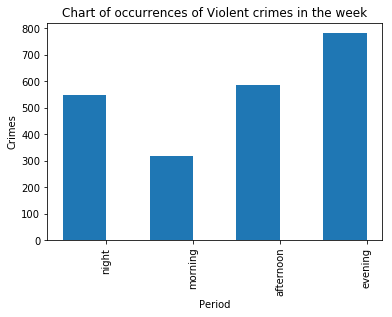


Non Violent
At night crimes: 3956
At morning crimes: 3782
At afternoon crimes: 6547
At evening crimes: 6851


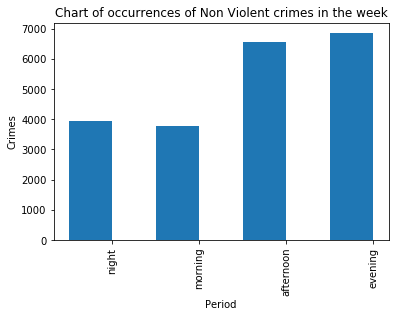

In [44]:
#When are the most violent crimes committed? How about nonviolent?
#Solution: For this question, the same process was made, but for this time de column Start Date/Time was used

#Code:
print(" - When are the most violent crimes committed? How about nonviolent?")
rate_violent = calc_day_of_week('Violent', crimes_violent)
rate_noviolent = calc_day_of_week('Non Violent', crimes_nonviolent)
print("===================================================================================")

## 7. Posing and answering your own questions

After you've finished exploring the data and answering some directed questions, you should be able to start coming up with some of your own.

You can think of questions based on a few strategies:

- Expanding or tweaking the directed questions from earlier.
- Exploring patterns you found while exploring the data.
- Questions based on research you've done about the previous lessons

Try to think of at least three questions, then answer them the same way you did in previous screens.

## a) Analysis of crimes occurrence separated by type and days of the week
This analysis explore the diffences between crimes occurrences based in types, i.e. Violent and Non-violent. The study is demonstrated with a view of each day of week divided into part of day and a general view with all days of week. In other words, with this analysis is possible see:
* What part of day of sundays has more violent crimes;
* What day of week has more non-violent crimes

In [45]:
# Load initial variables and functions definitions
crimes = pd.read_csv("MontgomeryCountyCrime2013_1.csv")

def plotcrimesofweek(crimes, str_sig):
    num_cols = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    bar_heights = crimes
    bar_positions = arange(len(crimes)) + 0.75
    fig, ax = plt.subplots()
    ax.bar(bar_positions, bar_heights, 0.5)    
    tick_positions = range(1,8)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(num_cols, rotation=90)
    plt.xlabel("Day pf the Week")
    plt.ylabel("Crimes")
    plt.title("Chart of occurrences of " + str_sig +  " crimes in the week")
    plt.show()
    return


def plotperiodofweel(periods, str_sig, str_week):
    num_cols = ['night', 'morning', 'afternoon', 'evening']
    bar_heights = periods
    bar_positions = arange(len(periods)) + 0.75
    fig, ax = plt.subplots()
    ax.bar(bar_positions, bar_heights, 0.5)    
    tick_positions = range(1,5)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(num_cols, rotation=90)
    plt.xlabel("Period")
    plt.ylabel("Crimes")
    plt.title("Chart of occurrences of " + str_sig +  " crimes on " + str_week)
    plt.show()
    return


def calc_day_of_week(str, str_sig, crimes, n):
    weekday = pd.DataFrame(columns=crimes.columns)
    for i in range (0, len(crimes) - 1):
        if crimes.iloc[i, crimes.columns.get_loc('Number Weekday')] == n:
            weekday.loc[i] = crimes.loc[i]
    print('\n'+str)
    night = []
    morning = []
    afternoon = []
    evening = []
    night = [s for s in weekday["Start Date / Time"] if (s.endswith("AM") & ((s.endswith("12",10,13)) | s.endswith("01",10,13) |
                                                                             s.endswith("02",10,13) | s.endswith("03",10,13) |
                                                                             s.endswith("04",10,13) | s.endswith("05",10,13)))]
    morning = [s for s in weekday["Start Date / Time"] if (s.endswith("AM") & ((s.endswith("06",10,13)) | s.endswith("07",10,13) |
                                                                             s.endswith("08",10,13) | s.endswith("09",10,13) |
                                                                             s.endswith("10",10,13) | s.endswith("11",10,13)))]
    afternoon = [s for s in weekday["Start Date / Time"] if (s.endswith("PM") & ((s.endswith("12",10,13)) | s.endswith("01",10,13) |
                                                                             s.endswith("02",10,13) | s.endswith("03",10,13) |
                                                                             s.endswith("04",10,13) | s.endswith("05",10,13)))]
    evening = [s for s in weekday["Start Date / Time"] if (s.endswith("PM") & ((s.endswith("06",10,13)) | s.endswith("07",10,13) |
                                                                             s.endswith("08",10,13) | s.endswith("09",10,13) |
                                                                             s.endswith("10",10,13) | s.endswith("11",10,13)))]

    print("At night crimes:", len(night))
    print("At morning crimes:", len(morning))
    print("At afternoon crimes:", len(afternoon))
    print("At evening crimes:", len(evening))
    plotperiodofweel([len(night),len(morning),len(afternoon),len(evening)], str_sig, str)
    return [len(night),len(morning),len(afternoon),len(evening)];


viol_crime = crimes["Violent"]
sectors_crime = crimes["Sector"]
districts_crime = crimes["Police District Number"]
city_crime = crimes["City"]
column_names = crimes.columns

In [46]:
# Load data between Violent and non-violent datasets
crimes_violent = crimes.loc[crimes['Violent'] == True]
crimes_area_violent = crimes_violent["Police District Number"].value_counts()
crimes_nonviolent = crimes.loc[crimes['Violent'] == False]
crimes_area_nonviolent = crimes_nonviolent["Police District Number"].value_counts()


.....................Results of violents crimes................

Monday
At night crimes: 54
At morning crimes: 53
At afternoon crimes: 85
At evening crimes: 102


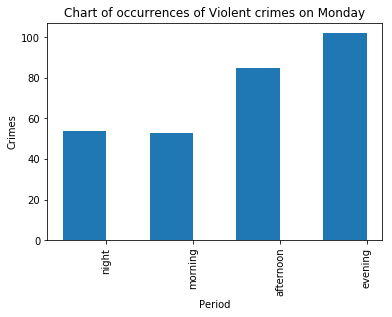


Tuesday
At night crimes: 51
At morning crimes: 57
At afternoon crimes: 94
At evening crimes: 110


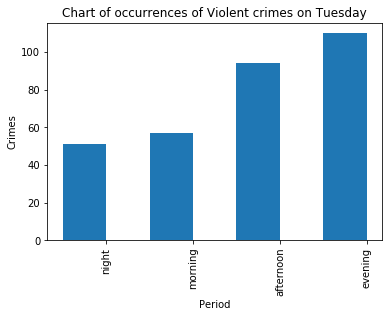


Wednesday
At night crimes: 71
At morning crimes: 45
At afternoon crimes: 102
At evening crimes: 106


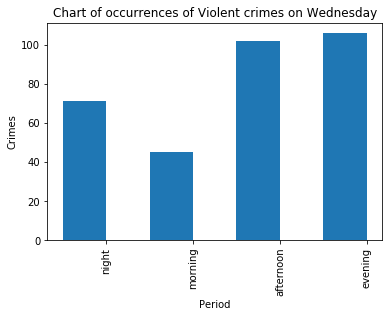


Thursday
At night crimes: 58
At morning crimes: 45
At afternoon crimes: 74
At evening crimes: 118


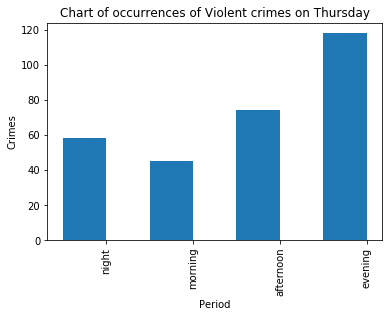


Friday
At night crimes: 64
At morning crimes: 45
At afternoon crimes: 82
At evening crimes: 129


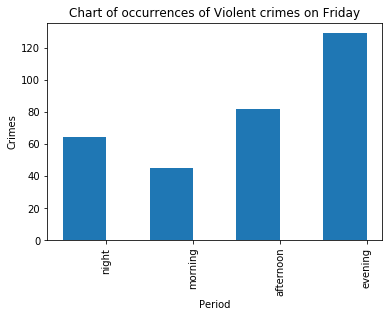


Saturday
At night crimes: 117
At morning crimes: 39
At afternoon crimes: 76
At evening crimes: 121


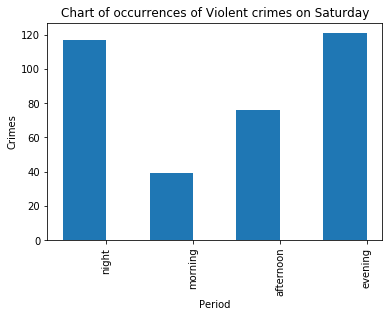


Sunday
At night crimes: 133
At morning crimes: 34
At afternoon crimes: 73
At evening crimes: 95


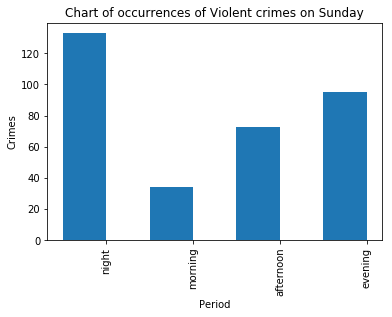

Violent crimes separeted in days of week


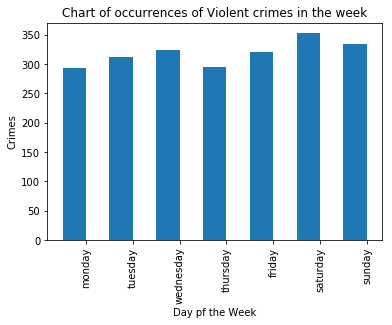

In [47]:
# Calculate result for violent crimes
print("\n.....................Results of violents crimes................")
week_number = []
week_number = pd.to_datetime(crimes_violent["Start Date / Time"]).dt.weekday
dat_s = pd.DataFrame({'Number Weekday':week_number})
crimes_b = []
crimes_b = crimes.join(dat_s);

rate_mon = calc_day_of_week('Monday','Violent', crimes_b, 0)
rate_tues = calc_day_of_week('Tuesday','Violent', crimes_b, 1)
rate_wed = calc_day_of_week('Wednesday','Violent', crimes_b, 2)
rate_thur = calc_day_of_week('Thursday','Violent', crimes_b, 3)
rate_fri = calc_day_of_week('Friday','Violent', crimes_b, 4)
rate_sat = calc_day_of_week('Saturday','Violent', crimes_b, 5)
rate_sun =calc_day_of_week('Sunday','Violent', crimes_b, 6)

print('Violent crimes separeted in days of week')
plotcrimesofweek([sum(rate_mon),sum(rate_tues),sum(rate_wed),sum(rate_thur),sum(rate_fri),sum(rate_sat),sum(rate_sun)], 'Violent')


.....................Results of non-violents crimes................

Monday
At night crimes: 418
At morning crimes: 633
At afternoon crimes: 931
At evening crimes: 881


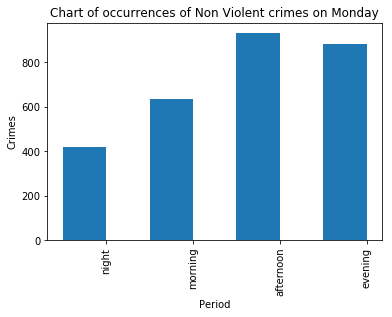


Tuesday
At night crimes: 477
At morning crimes: 612
At afternoon crimes: 977
At evening crimes: 1084


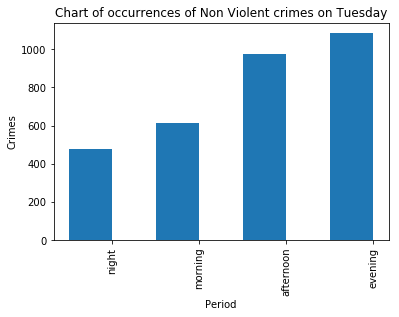


Wednesday
At night crimes: 407
At morning crimes: 571
At afternoon crimes: 1043
At evening crimes: 1085


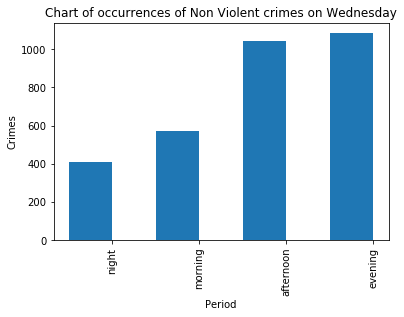


Thursday
At night crimes: 509
At morning crimes: 575
At afternoon crimes: 948
At evening crimes: 1022


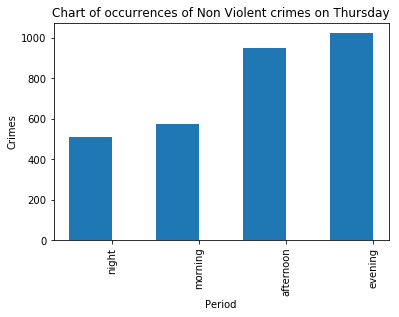


Friday
At night crimes: 591
At morning crimes: 594
At afternoon crimes: 1087
At evening crimes: 1127


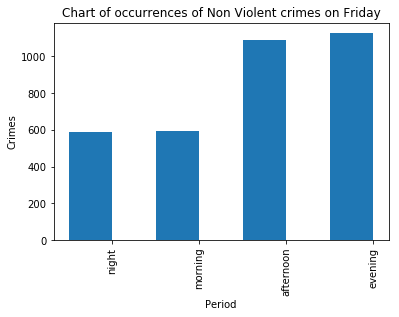


Saturday
At night crimes: 839
At morning crimes: 433
At afternoon crimes: 827
At evening crimes: 891


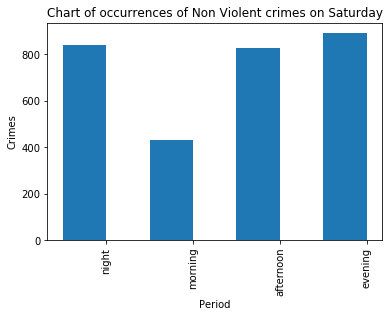


Sunday
At night crimes: 714
At morning crimes: 364
At afternoon crimes: 734
At evening crimes: 761


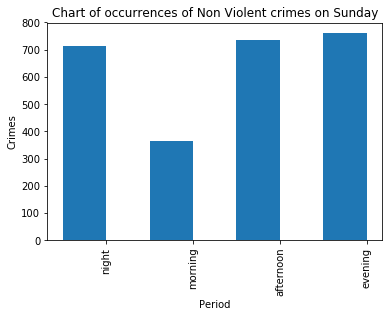

Non-violent crimes separeted in days of week


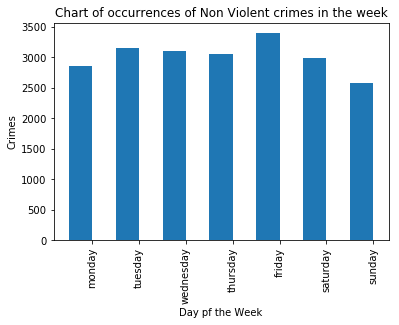

In [48]:
# Calculate result for non-violent crimes
print("\n.....................Results of non-violents crimes................")
week_number = []
week_number = pd.to_datetime(crimes_nonviolent["Start Date / Time"]).dt.weekday
dat_s = pd.DataFrame({'Number Weekday':week_number})
crimes_bn = []
crimes_bn = crimes.join(dat_s);

rate_mon = calc_day_of_week('Monday','Non Violent', crimes_bn, 0)
rate_tues = calc_day_of_week('Tuesday','Non Violent', crimes_bn, 1)
rate_wed = calc_day_of_week('Wednesday','Non Violent', crimes_bn, 2)
rate_thur = calc_day_of_week('Thursday','Non Violent', crimes_bn, 3)
rate_fri = calc_day_of_week('Friday','Non Violent', crimes_bn, 4)
rate_sat = calc_day_of_week('Saturday','Non Violent', crimes_bn, 5)
rate_sun =calc_day_of_week('Sunday','Non Violent', crimes_bn, 6)

print('Non-violent crimes separeted in days of week')
plotcrimesofweek([sum(rate_mon),sum(rate_tues),sum(rate_wed),sum(rate_thur),sum(rate_fri),sum(rate_sat),sum(rate_sun)], 'Non Violent')

## b) Analysis of crimes occurrence separated by type and places
This analysis explore the diffences between crimes occurrences based in types, i.e. Violent and Non-violent. The study is demonstrated with a view of occurrence by place divided by type and a general view with all places. In other words, with this analysis is possible see:
* Which places have more crimes, and what kind is most common;


In [49]:
print("Which places have more crimes?\n")
places_crime = crimes["Place"]
print(places_crime.value_counts().head())

Which places have more crimes?

Residence - Single Family      2729
Street - In vehicle            2581
Residence - Apartment/Condo    1847
Street - Residential           1681
Other/Unknown                  1404
Name: Place, dtype: int64


In [50]:
print("Which places has more non-violent crimes?\n")
for place in places_crime.unique():    
    c = crimes[(crimes["Place"] == place) & (crimes["Violent"] == False)]["Place"].value_counts()
    print(place,c.values)

Which places has more non-violent crimes?

Residence - Single Family [2383]
Street - In vehicle [2483]
Parking Garage - County [92]
Street - Residential [1506]
Street - Commercial [634]
Other/Unknown [1382]
School/College [464]
Parking Lot - Residential [993]
Convenience Store [161]
Government Building [241]
Parking Garage - Residential [152]
Residence -Townhouse/Duplex [796]
Residence - Driveway [792]
Parking Lot - Commercial [922]
Gas Station [146]
Hotel/Motel/Etc. [132]
Residence - Carport [35]
Hospital/Emergency Care Center [75]
Parking Garage - Commercial [92]
Grocery/Supermarket [316]
Golf Course [26]
Residence - Apartment/Condo [1464]
Retail - Other [312]
Restaurant [419]
Pool [42]
Street - Other [543]
Bank - ATM [112]
Park [123]
Residence - Other [347]
Retail - Clothing [171]
Residence - Garage [95]
Wooded Area [45]
Residence - Shed [48]
Parking Lot - Other [158]
Parking Garage - Other [29]
Auto Dealership [76]
Residence - Yard [327]
Retail - Department/Discount Store [604]
Doc

In [51]:
print("Which places has more violent crimes?\n")
for place in places_crime.unique():
    c = crimes[(crimes["Place"] == place) & (crimes["Violent"] == True)]["Place"].value_counts()
    print(place,c.values)

Which places has more violent crimes?

Residence - Single Family [346]
Street - In vehicle [98]
Parking Garage - County [3]
Street - Residential [175]
Street - Commercial [99]
Other/Unknown [22]
School/College [120]
Parking Lot - Residential [73]
Convenience Store [19]
Government Building [6]
Parking Garage - Residential [1]
Residence -Townhouse/Duplex [169]
Residence - Driveway [18]
Parking Lot - Commercial [98]
Gas Station [20]
Hotel/Motel/Etc. [27]
Residence - Carport []
Hospital/Emergency Care Center [12]
Parking Garage - Commercial [3]
Grocery/Supermarket [14]
Golf Course []
Residence - Apartment/Condo [383]
Retail - Other [20]
Restaurant [62]
Pool [3]
Street - Other [85]
Bank - ATM [10]
Park [18]
Residence - Other [22]
Retail - Clothing [3]
Residence - Garage [3]
Wooded Area [7]
Residence - Shed []
Parking Lot - Other [12]
Parking Garage - Other [1]
Auto Dealership [2]
Residence - Yard [44]
Retail - Department/Discount Store [15]
Doctor/Dentist/Vet Office [4]
Retail - Mall [16]
B

In [52]:
print("Which are the 5 most common violent crimes and which places occur it?\n")
print(crimes[((crimes["Violent"] == True))].groupby(["Place",'Class Description']).size().nlargest(5))

print("\nWhich are the 5 most common non-violent crimes and which places occur it?\n")
print(crimes[((crimes["Violent"] == False))].groupby(["Place",'Class Description']).size().nlargest(5))

Which are the 5 most common violent crimes and which places occur it?

Place                        Class Description               
Residence - Apartment/Condo  ASSAULT & BATTERY SPOUSE/PARTNER    109
Residence - Single Family    ASSAULT & BATTERY SPOUSE/PARTNER     83
                             FAMILY OFFENSE - ABUSE/CHILD         46
Residence - Apartment/Condo  ASSAULT & BATTERY - CITIZEN          39
Residence - Single Family    SIMPLE ASSAULT SPOUSE/PARTNER        37
dtype: int64

Which are the 5 most common non-violent crimes and which places occur it?

Place                      Class Description              
Street - In vehicle        DRIVING UNDER THE INFLUENCE        1123
                           CDS-POSS MARIJUANA/HASHISH          642
Other/Unknown              FORGERY/CNTRFT - IDENTITY THEFT     373
                           LOST PROPERTY                       302
Residence - Single Family  MENTAL TRANSPORT                    246
dtype: int64


In [60]:
import folium
from folium import plugins

crimeArr = crimes[(~np.isnan(crimes['Latitude']))][['Latitude', 'Longitude']].as_matrix()
m = folium.Map([39.105561, -77.144617], zoom_start=10)
# plot heatmap
m.add_children(plugins.HeatMap(crimeArr, radius=10))

### New feasible analysis

#### Police Efficience Analysis
* Analysing the average time between start time and dispatch time;
* Analysing the average response time in function of violent and non-violent crimes type;

#### Statistical Analysis From the Crimes Place Information
* Analysing which are the most frequents crimes place, divided by: violent and non-violent type, district;

#### Crimes Evolution In Time Analysis
* Analysing the violent and non-violent crimes evolution over time, divided by general or per district;
* Analysing the crimes evolution by place over time, divided by general or per district;